# Time series: the weather in Göttingen from 1947 to 2015

## Data

The file ./data/produkt_klima_Tageswerte_19470101_20151231_01691.txt contains the daily measurements of the Göttingen weather station from 1947 untill 2015. It is just a plain text file, open it in a text editor to see how the data is organized.
This dataset along with many others can be downloaded from the FTP-server of the DWD (German Meteorological Office):
ftp://ftp-cdc.dwd.de/pub/CDC/

## Preprocessing

* Load the data with np.loadtxt. Hint: The first line is the header and the last column contains text. Use the parameters of np.loadtxt to exclude these. 

* For convenience, you can extract some interesting columns with slicing, e.g. MESS_DATUM (date), LUFTTEMPERATUR (air temperature), REL_FEUCHTE (humidity), NIEDERSCHLAGSHOEHE (precipitation), SONNENSCHEINDAUER (duration of sunshine), and store them in a 1d-array.

* Values of -999 indicate that there is no data available. This is annoying for many applications, e.g. if you compute the average or if you plot the data. Use a boolean index array to replace all -999 with the value np.nan ("nan" means not-a-number).

## Analysis

1. Plot air **temperature, humidity, precipitation** and the duration of **sunshine** of the data the last **three years**.

2. Plot a histogram of the temperature data. Mark the positions of the median, the mean, the upper and lower 20%-percentiles, ...

3. Retrieve the **value** of a time series given the **date**. Write a function which takes two arguments, a time series and a date, and returns the value of the time series on that specific day. 

4. Plot the average **temperature as a function of the year**.
    Suggestion: reshape the temperature time series into a two dimensional array such that its shape is 68 years x 365 days (before you do that you can use a boolean index array to remove the February 29th every four years). Then you can calculate the mean along one or the other axis to get a temperature profile of a year (averaged over all years) or the long-term trend of the temperature over 68 years, respectively.

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Preprocessing

In [7]:
filename = './data/produkt_klima_Tageswerte_19470101_20151231_01691.txt'
data = np.loadtxt(filename, skiprows=1, delimiter=';', usecols=range(17))
shape = data.shape

In [4]:
#Extract some columns
date = data[:,1]
temperature = data[:,3]
humidity = data[:,7]
precipitation = data[:,13]
sunshine = data[:,15]

#Replace the -999 values by np.nan
sunshine[sunshine==-999] = np.nan
humidity[humidity==-999] = np.nan

## Analysis

### Visualization of the last three years

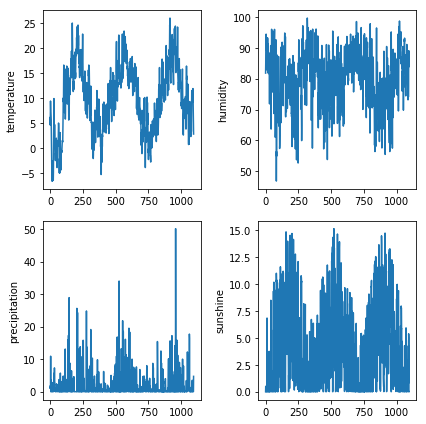

In [8]:
plt.figure(figsize=(6,6))

ndays = 365*3

plt.subplot(2,2,1)
plt.ylabel("temperature")
plt.plot(temperature[-ndays:])

plt.subplot(2,2,2)
plt.ylabel("humidity")
plt.plot(humidity[-ndays:])

plt.subplot(2,2,3)
plt.ylabel("precipitation")
plt.plot(precipitation[-ndays:])

plt.subplot(2,2,4)
plt.ylabel("sunshine")
plt.plot(sunshine[-ndays:])

plt.tight_layout()

### A function to extract a value on a specified date

In [9]:
def get_value(series, day):
    '''Get the value of a time series on a specific day.'''
    return series[np.argwhere(date==day)][0,0]

print("On January 26, 1994, python 1 was released and the temperature in Göttingen was {} °C.".format(get_value(temperature,19940126)))
print("On October 16, 2000, python 2 was released and the sun was shining for {} hours in Göttingen.".format(get_value(sunshine,20001016)))
print("On December 3, 2008, python 3 was released and it was raining {} mm in Göttingen.".format(get_value(precipitation,20081203)))


On January 26, 1994, python 1 was released and the temperature in Göttingen was 3.7 °C.
On October 16, 2000, python 2 was released and the sun was shining for 5.0 hours in Göttingen.
On December 3, 2008, python 3 was released and it was raining 3.2 mm in Göttingen.


### Histogram and cumulative distribution

Text(0, 0.5, 'number of days')

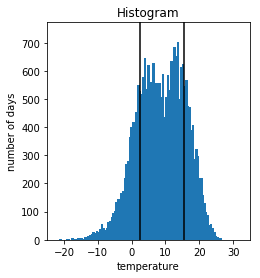

In [11]:
# Sort the temperature values to get lower and upper 20th percentile
temperature_sorted = np.sort(temperature)
t_lower_20th_percentile = temperature_sorted[int(0.2*len(temperature))]
t_upper_20th_percentile = temperature_sorted[int(0.8*len(temperature))]

# Compute histogram
hist, bin_edges = np.histogram(temperature, bins=100)

# Plot histogram
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.bar(bin_edges[:-1], hist)
plt.vlines(t_lower_20th_percentile, 0, 1000)
plt.vlines(t_upper_20th_percentile, 0, 1000)
plt.ylim(0,1.1*np.max(hist))
plt.xlim(-25,35)
plt.title("Histogram")
plt.xlabel("temperature")
plt.ylabel("number of days")


In [12]:
# Remove all Feburary 29 to get years of equal length
index_array = np.array([str(int(d))[-4:]=='0229' for d in date])
print("List of leap days to be excluded:")
print(date[index_array])
temperature_without_leapdays = temperature[np.logical_not(index_array)]

# Now we can reshape it
temperature_reshaped = temperature_without_leapdays.reshape((-1,365))

List of leap days to be excluded:
[19480229. 19520229. 19560229. 19600229. 19640229. 19680229. 19720229.
 19760229. 19800229. 19840229. 19880229. 19920229. 19960229. 20000229.
 20040229. 20080229. 20120229.]


Text(0.5, 1.0, 'Temperature averaged over all years')

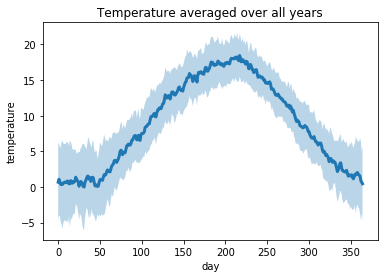

In [20]:
# By averaging over axis 0 we get a values for each day averaged over all years
mu = np.mean(temperature_reshaped, axis=0)
std = np.std(temperature_reshaped, axis=0)
x = np.arange(len(mu))

plt.plot(x, mu, linewidth=3)
plt.fill_between(x, mu-std, mu+std, alpha=0.3)

pl.xlabel("day")
pl.ylabel("temperature")

pl.title("Temperature averaged over all years")

Text(0, 0.5, 'temperature')

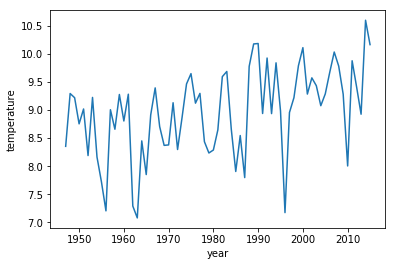

In [21]:
# By averaging over axis 1 we get a value for each year averaged over all days of that year
temp_trend = np.mean(temperature_reshaped,axis=1)

plt.plot(1947 + np.arange(len(temp_trend)), temp_trend, label='mean temp.')
plt.xlabel("year")
plt.ylabel("temperature")
